# LastFM Data Analysis Using PySpark

<img src="https://github.com/ijoseff/ijoseff.github.io/blob/master/assets/img/portfolio/lastfm.png?raw=true" width = '800' height = '400' />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#LastFM-Data-Analysis-Using-PySpark" data-toc-modified-id="LastFM-Data-Analysis-Using-PySpark-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LastFM Data Analysis Using PySpark</a></span></li><li><span><a href="#Overview" data-toc-modified-id="Overview-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Install-Pyspark" data-toc-modified-id="Install-Pyspark-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Install Pyspark</a></span></li><li><span><a href="#Mount-Google-Drive-And-Import-Libraries" data-toc-modified-id="Mount-Google-Drive-And-Import-Libraries-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mount Google Drive And Import Libraries</a></span></li><li><span><a href="#Create-Spark-Session" data-toc-modified-id="Create-Spark-Session-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Create Spark Session</a></span></li><li><span><a href="#Import-Listening-Dataset" data-toc-modified-id="Import-Listening-Dataset-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Import Listening Dataset</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Query-Entries-And-Gather-Insights" data-toc-modified-id="Query-Entries-And-Gather-Insights-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Query Entries And Gather Insights</a></span><ul class="toc-item"><li><span><a href="#Tracks-And-Artist" data-toc-modified-id="Tracks-And-Artist-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Tracks And Artist</a></span></li><li><span><a href="#Records-of-those-users-who-have-listened-to-Rihanna" data-toc-modified-id="Records-of-those-users-who-have-listened-to-Rihanna-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Records of those users who have listened to Rihanna</a></span></li><li><span><a href="#Top-10-Users-Who-Are-Fan-Of-Rihanna" data-toc-modified-id="Top-10-Users-Who-Are-Fan-Of-Rihanna-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Top 10 Users Who Are Fan Of Rihanna</a></span></li><li><span><a href="#Top-10-Famous-Tracks" data-toc-modified-id="Top-10-Famous-Tracks-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Top 10 Famous Tracks</a></span></li><li><span><a href="#Top-10-Famous-Tracks-Of-Rihanna" data-toc-modified-id="Top-10-Famous-Tracks-Of-Rihanna-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Top 10 Famous Tracks Of Rihanna</a></span></li><li><span><a href="#Top-10-Famous-Albums" data-toc-modified-id="Top-10-Famous-Albums-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Top 10 Famous Albums</a></span></li></ul></li><li><span><a href="#Import-Genre-Dataset" data-toc-modified-id="Import-Genre-Dataset-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Import Genre Dataset</a></span></li><li><span><a href="#Listening-And-Genre-Dataset-Combination" data-toc-modified-id="Listening-And-Genre-Dataset-Combination-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Listening And Genre Dataset Combination</a></span></li><li><span><a href="#More-Query-Entries-And-Gathering-Of-Insights" data-toc-modified-id="More-Query-Entries-And-Gathering-Of-Insights-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>More Query Entries And Gathering Of Insights</a></span><ul class="toc-item"><li><span><a href="#Top-10-Users-Who-Are-Fan-Of-Pop-Music" data-toc-modified-id="Top-10-Users-Who-Are-Fan-Of-Pop-Music-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Top 10 Users Who Are Fan Of Pop Music</a></span></li><li><span><a href="#Top-10-Famous-Genres" data-toc-modified-id="Top-10-Famous-Genres-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Top 10 Famous Genres</a></span></li><li><span><a href="#User-Favorite-Genre" data-toc-modified-id="User-Favorite-Genre-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>User Favorite Genre</a></span></li><li><span><a href="#Numbers-of-Pop,-Rock,-Metal-And-Hiphop-Singers" data-toc-modified-id="Numbers-of-Pop,-Rock,-Metal-And-Hiphop-Singers-11.4"><span class="toc-item-num">11.4&nbsp;&nbsp;</span>Numbers of Pop, Rock, Metal And Hiphop Singers</a></span></li></ul></li></ul></div>

# Overview

As a data scientist or data analyst, one of the important topics that every data analyst should be familiar with is the distributed data processing technologies. In this project, different queries will be conducted to the dataset to extract useful information out of it. 

But in this case, the data is so big that working with it on the local machine is not easy to be done. That is when the distributed data processing and Spark Technology will become handy.

So in this project, Pyspark module in python and google colab environment will be use in order to apply some queries to the dataset which related to lastfm website which is an online music service where users can listen to different songs. This dataset is containing two csv files listening.csv and genre.csv. The dataset contains over 13 million rows of data.

**Source:**
 - https://www.last.fm/

# Install Pyspark

In [48]:
# Install PySpark library
!pip install pyspark

# Mount Google Drive And Import Libraries

In [49]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
# Import libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max, struct
import matplotlib.pyplot as plt
from pyspark import SparkContext
from pyspark.sql import SQLContext

# Create Spark Session

In [51]:
# Create spark session
spark = SparkSession.builder.appName('spark_app').getOrCreate

# Import Listening Dataset

In [87]:
# Create shortcut term
sc = SparkContext.getOrCreate()

# label SQL Context
sqlContext = SQLContext(sc)

# Import listening.csv file
listening_csv_path = '/content/drive/My Drive/dataset/listenings.csv'
 
# Create data frame
listening_df = sqlContext.read.load(listening_csv_path, 
                      format='com.databricks.spark.csv', 
                      header='true', 
                      inferSchema='true')

In [88]:
# Check data
listening_df.show()

+-----------+-------------+--------------------+---------------+--------------------+
|    user_id|         date|               track|         artist|               album|
+-----------+-------------+--------------------+---------------+--------------------+
|000Silenced|1299680100000|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|          Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|      Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      

# Feature Selection

In [89]:
# Delete useless columns
listening_df = listening_df.drop('date')

In [90]:
# Drop null values
listening_df = listening_df.na.drop()

In [60]:
# Check dataset
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

In [61]:
# Check schema
listening_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [62]:
# Check dataframe dimension
shape = (listening_df.count(), len(listening_df.columns))

# Show shape
print(shape)

(13758905, 4)


# Query Entries And Gather Insights

## Tracks And Artist

In [63]:
# Query: Select two columns, tracks and artist
q0 = listening_df.select('artist', 'track')

# Show dataframe
q0.show()

+---------------+--------------------+
|         artist|               track|
+---------------+--------------------+
|       Jessie J|           Price Tag|
|       Jessie J|Price Tag (Acoust...|
|          Robyn|Be Mine! (Ballad ...|
|          Kelis|            Acapella|
|      The Tease|   I'm Not Invisible|
|       MSTRKRFT|Bounce (Feat NORE...|
|        Rihanna|Don't Stop The Mu...|
|      Meshuggah|               ObZen|
|         Gojira|   Yama's Messengers|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|On the Brink of E...|
|   Napalm Death|        In Deference|
|    Decapitated|      Post(?)organic|
|   Dom & Roland|        Mind Feeders|
|Cannibal Corpse|Necrosadistic War...|
|   Dom & Roland|     Dance All Night|
|   Dom & Roland|          Late Night|
|   Dom & Roland|          Freak Seen|
|   Dom & Roland|Paradrenasite (Hi...|
|   Dom & Roland|               Rhino|
+---------------+--------------------+
only showing top 20 rows



## Records of those users who have listened to Rihanna

In [64]:
# Query: Records of those users who have listened to Rihanna
q1 = listening_df.select('*').filter(listening_df.artist == 'Rihanna')

# Show dataframe
q1.show()

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
|      0rdos|There's a Thug in...|Rihanna|    Music of the Sun|
|      0rdos|                Rush|Rihanna|    Music of the Sun|
|      0rdos|              Let Me|Rihann

## Top 10 Users Who Are Fan Of Rihanna

In [68]:
# Query: Top 10 users who are fan of Rihanna
q2 = listening_df.select('user_id').filter(listening_df.artist == 'Rihanna').groupby('user_id').agg(count('user_id').alias('count')).orderBy(desc('count')).limit(10)

# Show dataframe
q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



## Top 10 Famous Tracks

In [69]:
# Query: Top 10 famous tracks
q3 = listening_df.select('artist', 'track').groupby('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)

# Show dataframe
q3.show()

+--------------+-----------------+-----+
|        artist|            track|count|
+--------------+-----------------+-----+
| Justin Bieber|            Sorry| 3381|
|Arctic Monkeys| Do I Wanna Know?| 2865|
|      Bon Iver|      Skinny Love| 2836|
|          Zayn|       PILLOWTALK| 2701|
|   The Killers|    Mr Brightside| 2690|
|       Rihanna|             Work| 2646|
|      Bastille|          Pompeii| 2606|
|Mumford & Sons|  Little Lion Man| 2520|
|Mumford & Sons|         The Cave| 2485|
| Justin Bieber|What Do You Mean?| 2481|
+--------------+-----------------+-----+



## Top 10 Famous Tracks Of Rihanna

In [77]:
# Query: Top 10 famous tracks of Rihanna
q4 = listening_df.select('artist', 'track').filter(listening_df.artist == 'Rihanna').groupby('artist', 'track').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)

# Check dataframe
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



## Top 10 Famous Albums

In [84]:
# Query: Top 10 famous albums
q5 = listening_df.select('artist', 'album').groupby('artist', 'album').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)

# Check dataframe
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



# Import Genre Dataset

In [92]:
# Import genre.csv file
genre_csv_path = '/content/drive/My Drive/dataset/genre.csv'

# Create data frame
genre_df = sqlContext.read.load(genre_csv_path, 
                      format='com.databricks.spark.csv', 
                      header='true', 
                      inferSchema='true')

In [93]:
# Check data
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



In [94]:
# Check dataframe
listening_df.show()

+-----------+--------------------+---------------+--------------------+
|    user_id|               track|         artist|               album|
+-----------+--------------------+---------------+--------------------+
|000Silenced|           Price Tag|       Jessie J|         Who You Are|
|000Silenced|Price Tag (Acoust...|       Jessie J|           Price Tag|
|000Silenced|Be Mine! (Ballad ...|          Robyn|            Be Mine!|
|000Silenced|            Acapella|          Kelis|            Acapella|
|000Silenced|   I'm Not Invisible|      The Tease|   I'm Not Invisible|
|000Silenced|Bounce (Feat NORE...|       MSTRKRFT|         Fist of God|
|000Silenced|Don't Stop The Mu...|        Rihanna|Addicted 2 Bassli...|
|000Silenced|               ObZen|      Meshuggah|               ObZen|
|000Silenced|   Yama's Messengers|         Gojira|The Way of All Flesh|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For No...|
|000Silenced|On the Brink of E...|   Napalm Death|Time Waits For

# Listening And Genre Dataset Combination

In [95]:
# Inner join these two dataframes
data = listening_df.join(genre_df, how = 'inner', on = ['artist'])

# Show data
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

# More Query Entries And Gathering Of Insights

## Top 10 Users Who Are Fan Of Pop Music

In [101]:
# Query: Top 10 users who are fan of pop music
q6 = data.select('user_id').filter(data.genre == 'pop').groupby('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)

# Check dataframe
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



## Top 10 Famous Genres

In [102]:
# Query: Top 10 famous genres
q7 = data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)

# Check dataframe
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



## User Favorite Genre

In [105]:
# Query: Find out each user favorite genre
q8_1 = data.select('user_id', 'genre').groupby('user_id', 'genre').agg(count('*').alias('count')).orderBy('user_id')

# Check dataframe
q8_1.show()

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|         folktronica|    2|
| --Seph|          Nils Frahm|    1|
| --Seph|               indie|    3|
| --Seph| Boston Pops Orch...|    1|
| --Seph|           indie pop|    1|
| --Seph|   Alesso Feat Hurts|    1|
| --Seph|               Ruben|    4|
| --Seph| The Ambrosian Si...|    1|
| --Seph|               dance|    1|
| --Seph|               house|    3|
| --Seph|           classical|   31|
| --Seph| Tamás Vásáry & Y...|    1|
| --Seph|   progressive house|    1|
| --Seph|                folk|   10|
| --Seph|  progressive trance|    1|
| --Seph|     Jennifer Vyvyan|    1|
| --Seph|                soul|    1|
| --Seph|          electropop|    1|
| --Seph| Sir Colin Davis ...|    1|
| --Seph|          Thom Yorke|    2|
+-------+--------------------+-----+
only showing top 20 rows



In [109]:
# Query: Combine count and genre column, find each user favorite genre
q8_2 = q8_1.groupby('user_id').agg(max(struct(col('count'), col('genre'))).alias('max')).select(col('user_id'), col('max.genre'))

# Check dataframe
q8_2.show()

+---------------+-----------------+
|        user_id|            genre|
+---------------+-----------------+
|        -Gemma-|      british pop|
|        247flix|         synthpop|
|     A3sahaettr|            metal|
|        AYFBlog|       indie rock|
|  AdamMcSpaddam|             rock|
|        Alukarl|      death metal|
|       Ambalina|              pop|
|        AndyEgg|             rock|
| AngerisaGift14|             rock|
|      Anndddyyy|             rock|
|     BasilBrush|             rock|
|     BernieLick|             rock|
|      Big_Tiger|            indie|
|          Birks|singer-songwriter|
|         BolaJA|             rock|
|        Boone92|        metalcore|
|CameronWhittall|              pop|
|        Ceolmor|       electronic|
| CheeseMonkey91|              emo|
|  Chilled-Lemon|             rock|
+---------------+-----------------+
only showing top 20 rows



## Numbers of Pop, Rock, Metal And Hiphop Singers

In [112]:
# Query: Find out how many pop, rock, metal and hiphop singers
q9 = genre_df.select('genre').filter((col('genre') == 'pop') | (col('genre') == 'rock') | (col('genre') == 'metal') | (col('genre') == 'hip hop')).groupby('genre').agg(count('genre').alias('count'))

# Chech dataframe
q9.show()

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



In [114]:
# Returns all the records as a list of class:Row
q9_list = q9.collect()

In [120]:
# Get the list of genre
labels = [ row['genre'] for row in q9_list ]

# Get the count in each genre
counts = [ row['count'] for row in q9_list ]

# Show label and counts
print(labels)
print(counts)

['pop', 'hip hop', 'metal', 'rock']
[6960, 4288, 1854, 9066]


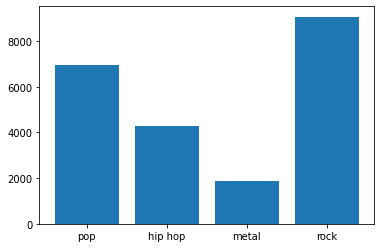

In [121]:
# Visualize these two list using a bar chart
plt.bar(labels, counts)
plt.show()